<a href="https://colab.research.google.com/github/VishnuBhaarath/Rainfallpred/blob/master/PlotLSTMdoublelayer50/50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from sklearn.metrics import r2_score

In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from numpy import hstack
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [0]:
df=pd.read_excel('trend_anna_imd_21.xlsx')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1
0,1. Cuddalore,NaN
1,1965-01-01 00:00:00,10.6
2,1965-01-02 00:00:00,0.0
3,1965-01-03 00:00:00,13.0
4,1965-01-04 00:00:00,0.0


In [0]:
Cuddalore=df[3655:19360]
Panruti=df[23016:38720]
Dharmapuri=df[42408:58082]
Harur=df[61738:77443]
Palacode=df[81158:96804]
Pennagaram=df[100460:116165]
Chengam=df[119821:135526]
Sathanur=df[138817:154522]
Tiruvanamalai=df[158178:173883]
Sankarapuram=df[177539:193244]
Tirukoilur=df[196899:212604]
ulundurpet=df[216260:231965]
Villupuram=df[235621:251326]
Denkanikottai=df[274343:290048]
Hosur=df[293703:309408]
Krishnagiri=df[313063:328768]
Marandahalli=df[332059:347764]
Rayakottai=df[353250:368955]
Uthangarai=df[372611:388316]


In [0]:
Cuddalore.columns = ['Date', 'Rainfall']
Panruti.columns= ['Date', 'Rainfall']
Dharmapuri.columns= ['Date', 'Rainfall']
Harur.columns= ['Date', 'Rainfall']
Palacode.columns= ['Date', 'Rainfall']
Pennagaram.columns= ['Date', 'Rainfall']
Chengam.columns= ['Date', 'Rainfall']
Sathanur.columns= ['Date', 'Rainfall']
Tiruvanamalai.columns= ['Date', 'Rainfall']
Sankarapuram.columns= ['Date', 'Rainfall']
Tirukoilur.columns= ['Date', 'Rainfall']
ulundurpet.columns= ['Date', 'Rainfall']
Villupuram.columns= ['Date', 'Rainfall']
Denkanikottai.columns= ['Date', 'Rainfall']
Hosur.columns= ['Date', 'Rainfall']
Krishnagiri.columns= ['Date', 'Rainfall']
Marandahalli.columns= ['Date', 'Rainfall']
Rayakottai.columns= ['Date', 'Rainfall']
Uthangarai.columns= ['Date', 'Rainfall']

In [0]:
train=Cuddalore[0:12000]
test=Cuddalore[12000:15704]
train1=Panruti[0:12000]
test1=Panruti[12000:15705]
train2=Dharmapuri[0:12000]
test2=Dharmapuri[12000:15674]
train3=Harur[0:12000]
test3=Harur[12000:15704]
train4=Palacode[0:12000]
test4=Palacode[12000:15646]
train5=Pennagaram[0:12000]
test5=Pennagaram[12000:15705]
train6=Chengam[0:12000]
test6=Chengam[12000:15705]
train7=Sathanur[0:12000]
test7=Sathanur[12000:15705]
train8=Tiruvanamalai[0:12000]
test8=Tiruvanamalai[12000:15165]
train9=Sankarapuram[0:12000]
test9=Sankarapuram[12000:15705]
train10=Tirukoilur[0:12000]
test10=Tirukoilur[12000:15705]
train11=ulundurpet[0:12000]
test11=ulundurpet[12000:15345]
train12=Villupuram[0:12000]
test12=Villupuram[12000:15705]
train13=Denkanikottai[0:12000]
test13=Denkanikottai[12000:15705]
train14=Hosur[0:12000]
test14=Hosur[12000:15678]
train15=Krishnagiri[0:12000]
test15=Krishnagiri[12000:15705]
train16=Marandahalli[0:12000]
test16=Marandahalli[12000:15705]
train17=Rayakottai[0:12000]
test17=Rayakottai[12000:15705]
train18=Uthangarai[0:12000]
test18=Uthangarai[12000:15705]

In [0]:
X_train=train['Rainfall']
X_test=test['Rainfall']
X_train1=train1['Rainfall']
X_test1=test1['Rainfall']
X_train2=train2['Rainfall']
X_test2=test2['Rainfall']
X_train3=train3['Rainfall']
X_test3=test3['Rainfall']
X_train4=train4['Rainfall']
X_test4=test4['Rainfall']
X_train5=train5['Rainfall']
X_test5=test5['Rainfall']
X_train6=train6['Rainfall']
X_test6=test6['Rainfall']
X_train7=train7['Rainfall']
X_test7=test7['Rainfall']
X_train8=train8['Rainfall']
X_test8=test8['Rainfall']
X_train9=train9['Rainfall']
X_test9=test9['Rainfall']
X_train10=train10['Rainfall']
X_test10=test10['Rainfall']
X_train11=train11['Rainfall']
X_test11=test11['Rainfall']
X_train12=train12['Rainfall']
X_test12=test12['Rainfall']
X_train13=train13['Rainfall']
X_test13=test13['Rainfall']
X_train14=train14['Rainfall']
X_test14=test14['Rainfall']
X_train15=train15['Rainfall']
X_test15=test15['Rainfall']
X_train16=train16['Rainfall']
X_test16=test16['Rainfall']
X_train17=train17['Rainfall']
X_test17=test17['Rainfall']
X_train18=train18['Rainfall']
X_test18=test18['Rainfall']


In [0]:
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(X_train.values.reshape(-1,1))
X_train = pd.DataFrame(x_scaled)

x_scaled1 = min_max_scaler.fit_transform(X_train1.values.reshape(-1,1))
X_train1 = pd.DataFrame(x_scaled1)

x_scaled2 = min_max_scaler.fit_transform(X_train2.values.reshape(-1,1))
X_train2 = pd.DataFrame(x_scaled2)

x_scaled3 = min_max_scaler.fit_transform(X_train3.values.reshape(-1,1))
X_train3 = pd.DataFrame(x_scaled3)

x_scaled4 = min_max_scaler.fit_transform(X_train4.values.reshape(-1,1))
X_train4 = pd.DataFrame(x_scaled4)

x_scaled5 = min_max_scaler.fit_transform(X_train5.values.reshape(-1,1))
X_train5 = pd.DataFrame(x_scaled5)

x_scaled6 = min_max_scaler.fit_transform(X_train6.values.reshape(-1,1))
X_train6 = pd.DataFrame(x_scaled6)

x_scaled7 = min_max_scaler.fit_transform(X_train7.values.reshape(-1,1))
X_train7 = pd.DataFrame(x_scaled7)

x_scaled8 = min_max_scaler.fit_transform(X_train8.values.reshape(-1,1))
X_train8 = pd.DataFrame(x_scaled8)

x_scaled9 = min_max_scaler.fit_transform(X_train9.values.reshape(-1,1))
X_train9 = pd.DataFrame(x_scaled9)

x_scaled10 = min_max_scaler.fit_transform(X_train10.values.reshape(-1,1))
X_train10 = pd.DataFrame(x_scaled10)

x_scaled11 = min_max_scaler.fit_transform(X_train11.values.reshape(-1,1))
X_train11 = pd.DataFrame(x_scaled11)

x_scaled1112 = min_max_scaler.fit_transform(X_train12.values.reshape(-1,1))
X_train12 = pd.DataFrame(x_scaled1112)

x_scaled13 = min_max_scaler.fit_transform(X_train13.values.reshape(-1,1))
X_train13 = pd.DataFrame(x_scaled13)

x_scaled14 = min_max_scaler.fit_transform(X_train14.values.reshape(-1,1))
X_train14 = pd.DataFrame(x_scaled14)

x_scaled15 = min_max_scaler.fit_transform(X_train15.values.reshape(-1,1))
X_train15 = pd.DataFrame(x_scaled15)

x_scaled16 = min_max_scaler.fit_transform(X_train16.values.reshape(-1,1))
X_train16 = pd.DataFrame(x_scaled16)

x_scaled17 = min_max_scaler.fit_transform(X_train17.values.reshape(-1,1))
X_train17 = pd.DataFrame(x_scaled17)

x_scaled18 = min_max_scaler.fit_transform(X_train18.values.reshape(-1,1))
X_train18 = pd.DataFrame(x_scaled18)



In [0]:
x_scaled1 = min_max_scaler.fit_transform(X_test.values.reshape(-1,1))
X_test = pd.DataFrame(x_scaled1)

x_scaled11 = min_max_scaler.fit_transform(X_test1.values.reshape(-1,1))
X_test1 = pd.DataFrame(x_scaled11)

x_scaled12 = min_max_scaler.fit_transform(X_test2.values.reshape(-1,1))
X_test2 = pd.DataFrame(x_scaled12)

x_scaled13 = min_max_scaler.fit_transform(X_test3.values.reshape(-1,1))
X_test3 = pd.DataFrame(x_scaled13)

x_scaled14 = min_max_scaler.fit_transform(X_test4.values.reshape(-1,1))
X_test4 = pd.DataFrame(x_scaled14)

x_scaled15 = min_max_scaler.fit_transform(X_test5.values.reshape(-1,1))
X_test5 = pd.DataFrame(x_scaled15)

x_scaled16 = min_max_scaler.fit_transform(X_test6.values.reshape(-1,1))
X_test6 = pd.DataFrame(x_scaled16)

x_scaled17 = min_max_scaler.fit_transform(X_test7.values.reshape(-1,1))
X_test7 = pd.DataFrame(x_scaled17)

x_scaled18 = min_max_scaler.fit_transform(X_test8.values.reshape(-1,1))
X_test8 = pd.DataFrame(x_scaled18)

x_scaled19 = min_max_scaler.fit_transform(X_test9.values.reshape(-1,1))
X_test9 = pd.DataFrame(x_scaled19)

x_scaled110 = min_max_scaler.fit_transform(X_test10.values.reshape(-1,1))
X_test10 = pd.DataFrame(x_scaled110)

x_scaled111 = min_max_scaler.fit_transform(X_test11.values.reshape(-1,1))
X_test11 = pd.DataFrame(x_scaled111)

x_scaled112 = min_max_scaler.fit_transform(X_test12.values.reshape(-1,1))
X_test12 = pd.DataFrame(x_scaled112)

x_scaled113 = min_max_scaler.fit_transform(X_test13.values.reshape(-1,1))
X_test13 = pd.DataFrame(x_scaled113)

x_scaled114 = min_max_scaler.fit_transform(X_test14.values.reshape(-1,1))
X_test14 = pd.DataFrame(x_scaled114)

x_scaled115= min_max_scaler.fit_transform(X_test15.values.reshape(-1,1))
X_test15 = pd.DataFrame(x_scaled115)

x_scaled116 = min_max_scaler.fit_transform(X_test16.values.reshape(-1,1))
X_test16 = pd.DataFrame(x_scaled116)

x_scaled117 = min_max_scaler.fit_transform(X_test17.values.reshape(-1,1))
X_test17 = pd.DataFrame(x_scaled117)

x_scaled118 = min_max_scaler.fit_transform(X_test18.values.reshape(-1,1))
X_test18 = pd.DataFrame(x_scaled118)


In [0]:
in_seq = np.array([X_train[0]])
in_seqtest1 = np.array([X_test[0]])

in_seq1 = np.array([X_train1[0]])
in_seqt11 = np.array([X_test1[0]])

in_seq12 = np.array([X_train2[0]])
in_seqt112 = np.array([X_test2[0]])

in_seq13 = np.array([X_train3[0]])
in_seqt113 = np.array([X_test3[0]])

in_seq14 = np.array([X_train4[0]])
in_seqt114 = np.array([X_test4[0]])

in_seq15 = np.array([X_train5[0]])
in_seqt115 = np.array([X_test5[0]])

in_seq16 = np.array([X_train6[0]])
in_seqt116 = np.array([X_test6[0]])

in_seq17 = np.array([X_train7[0]])
in_seqt117 = np.array([X_test7[0]])

in_seq18 = np.array([X_train8[0]])
in_seqt118 = np.array([X_test8[0]])

in_seq19 = np.array([X_train9[0]])
in_seqt119 = np.array([X_test9[0]])

in_seq110 = np.array([X_train10[0]])
in_seqt1110 = np.array([X_test10[0]])

in_seq111 = np.array([X_train11[0]])
in_seqt1111 = np.array([X_test11[0]])

in_seq112 = np.array([X_train12[0]])
in_seqt1112 = np.array([X_test12[0]])

in_seq113 = np.array([X_train13[0]])
in_seqt1113 = np.array([X_test13[0]])

in_seq114 = np.array([X_train14[0]])
in_seqt1114 = np.array([X_test14[0]])

in_seq115 = np.array([X_train15[0]])
in_seqt1115 = np.array([X_test15[0]])

in_seq116 = np.array([X_train16[0]])
in_seqt1116 = np.array([X_test16[0]])

in_seq117 = np.array([X_train17[0]])
in_seqt1117 = np.array([X_test17[0]])

in_seq118 = np.array([X_train18[0]])
in_seqt1118 = np.array([X_test18[0]])


In [0]:
in_seq = in_seq.reshape((12000, 1))
in_seqtest1 = in_seqtest1.reshape((3704, 1))

in_seq1 = in_seq1.reshape((12000, 1))
in_seqt11 = in_seqt11.reshape((3704, 1))

in_seq12 = in_seq12.reshape((12000, 1))
in_seqt112 = in_seqt112.reshape((3674, 1))

in_seq13 = in_seq13.reshape((12000, 1))
in_seqt113 = in_seqt113.reshape((3704, 1))

in_seq14 = in_seq14.reshape((12000, 1))
in_seqt114 = in_seqt114.reshape((3646, 1))

in_seq15 = in_seq15.reshape((12000, 1))
in_seqt115 = in_seqt115.reshape((3705, 1))

in_seq16 = in_seq16.reshape((12000, 1))
in_seqt116 = in_seqt116.reshape((3705, 1))

in_seq17 = in_seq17.reshape((12000, 1))
in_seqt117 = in_seqt117.reshape((3705, 1))

in_seq18 = in_seq18.reshape((12000, 1))
in_seqt118 = in_seqt118.reshape((3165, 1))

in_seq19 = in_seq19.reshape((12000, 1))
in_seqt119 = in_seqt119.reshape((3705, 1))

in_seq110 = in_seq110.reshape((12000, 1))
in_seqt1110 = in_seqt1110.reshape((3705, 1))

in_seq111 = in_seq111.reshape((12000, 1))
in_seqt1111 = in_seqt1111.reshape((3345, 1))

in_seq112 = in_seq112.reshape((12000, 1))
in_seqt1112 = in_seqt1112.reshape((3705, 1))

in_seq113 = in_seq113.reshape((12000, 1))
in_seqt1113 = in_seqt1113.reshape((3705, 1))

in_seq114 = in_seq114.reshape((12000, 1))
in_seqt1114 = in_seqt1114.reshape((3678, 1))

in_seq115 = in_seq115.reshape((12000, 1))
in_seqt1115 = in_seqt1115.reshape((3705, 1))

in_seq116 = in_seq116.reshape((12000, 1))
in_seqt1116 = in_seqt1116.reshape((3705, 1))

in_seq117 = in_seq117.reshape((12000, 1))
in_seqt1117 = in_seqt1117.reshape((3705, 1))

in_seq118 = in_seq118.reshape((12000, 1))
in_seqt1118 = in_seqt1118.reshape((3704, 1))



In [0]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
cuddataset1 = hstack((in_seqtest1))
cuddataset = hstack((in_seq))

pandataset1 = hstack((in_seqt11))
pandataset = hstack((in_seq1))

dhadataset1 = hstack((in_seqt112))
dhadataset = hstack((in_seq12))

hardataset1 = hstack((in_seqt113))
hardataset = hstack((in_seq13))

paldataset1 = hstack((in_seqt114))
paldataset = hstack((in_seq14))

pendataset1 = hstack((in_seqt115))
pendataset = hstack((in_seq15))

chedataset1 = hstack((in_seqt116))
chedataset = hstack((in_seq16))

satdataset1 = hstack((in_seqt117))
satdataset = hstack((in_seq17))

Tirdataset1 = hstack((in_seqt118))
Tirdataset = hstack((in_seq18))

Sandataset1 = hstack((in_seqt119))
Sandataset = hstack((in_seq19))

Tirudataset1 = hstack((in_seqt1110))
Tirudataset = hstack((in_seq110))

uludataset1 = hstack((in_seqt1111))
uludataset = hstack((in_seq111))

vildataset1 = hstack((in_seqt1112))
vildataset = hstack((in_seq112))

bardataset1 = hstack((in_seqt1113))
bardataset = hstack((in_seq113))

Dendataset1 = hstack((in_seqt1114))
Dendataset = hstack((in_seq114))

kridataset1 = hstack((in_seqt1115))
kridataset = hstack((in_seq115))

mardataset1 = hstack((in_seqt1116))
mardataset = hstack((in_seq116))

raydataset1 = hstack((in_seqt1117))
raydataset = hstack((in_seq117))

uthdataset1 = hstack((in_seqt1118))
uthdataset = hstack((in_seq118))


In [0]:
n_steps = 3
# convert into input/output
X, y = split_sequence(cuddataset, n_steps)
X1 , y1 = split_sequence(pandataset, n_steps)
X2 , y2 = split_sequence(dhadataset, n_steps)
X3 , y3 = split_sequence(hardataset, n_steps)
X4 , y4 = split_sequence(paldataset, n_steps)
X5 , y5 = split_sequence(pendataset, n_steps)
X6, y6 = split_sequence(chedataset, n_steps)
X7, y7 = split_sequence(satdataset, n_steps)
X8, y8 = split_sequence(Tirdataset, n_steps)
X9, y9 = split_sequence(Sandataset, n_steps)
X10, y10 = split_sequence(Tirudataset, n_steps)
X11, y11 = split_sequence(uludataset, n_steps)
X12 , y12 = split_sequence(vildataset, n_steps)
X13, y13 = split_sequence(bardataset, n_steps)
X14, y14 = split_sequence(Dendataset, n_steps)
X15, y15 = split_sequence(kridataset, n_steps)
X16, y16 = split_sequence(mardataset, n_steps)
X17, y17 = split_sequence(raydataset, n_steps)
X18, y18 = split_sequence(uthdataset, n_steps)

In [0]:
X_test,y_test = split_sequence(cuddataset1, n_steps)
X_test1,y_test1 = split_sequence(pandataset1, n_steps)
X_test2,y_test2= split_sequence(dhadataset1, n_steps)
X_test3,y_test3 = split_sequence(hardataset1, n_steps)
X_test4,y_test4 = split_sequence(paldataset1, n_steps)
X_test5,y_test5 = split_sequence(pendataset1, n_steps)
X_test6,y_test6 = split_sequence(chedataset1, n_steps)
X_test7,y_test7 = split_sequence(satdataset1, n_steps)
X_test8,y_test8 = split_sequence(Tirdataset1, n_steps)
X_test9,y_test9 = split_sequence(Sandataset1, n_steps)
X_test10,y_test10 = split_sequence(Tirudataset1, n_steps)
X_test11,y_test11= split_sequence(uludataset1, n_steps)
X_test12,y_test12 = split_sequence(vildataset1, n_steps)
X_test13,y_test13 = split_sequence(bardataset1, n_steps)
X_test14,y_test14 = split_sequence(Dendataset1, n_steps)
X_test15,y_test15 = split_sequence(kridataset1, n_steps)
X_test16,y_test16 = split_sequence(mardataset1, n_steps)
X_test17,y_test17= split_sequence(raydataset1, n_steps)
X_test18,y_test18= split_sequence(uthdataset1, n_steps)

In [0]:
y_test=np.nan_to_num(y_test)
y_test1=np.nan_to_num(y_test1)
y_test2=np.nan_to_num(y_test2)
y_test3=np.nan_to_num(y_test3)

y_test4=np.nan_to_num(y_test4)
y_test5=np.nan_to_num(y_test5)
y_test6=np.nan_to_num(y_test6)
y_test7=np.nan_to_num(y_test7)
y_test8=np.nan_to_num(y_test8)
y_test9=np.nan_to_num(y_test9)
y_test10=np.nan_to_num(y_test10)
y_test11=np.nan_to_num(y_test11)
y_test12=np.nan_to_num(y_test12)
y_test13=np.nan_to_num(y_test13)
y_test14=np.nan_to_num(y_test14)
y_test15=np.nan_to_num(y_test15)
y_test16=np.nan_to_num(y_test16)
y_test17=np.nan_to_num(y_test17)
y_test18=np.nan_to_num(y_test18)


In [18]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, 1)))
model.add(keras.layers.LSTM(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X1 = X1.reshape((X1.shape[0], X1.shape[1], 1))
X2 = X2.reshape((X2.shape[0], X2.shape[1], 1))
X3 = X3.reshape((X3.shape[0], X3.shape[1], 1))
X4 = X4.reshape((X4.shape[0], X4.shape[1], 1))
X5 = X5.reshape((X5.shape[0], X5.shape[1], 1))
X6 = X6.reshape((X6.shape[0], X6.shape[1], 1))
X7 = X7.reshape((X7.shape[0], X7.shape[1], 1))
X8 = X8.reshape((X8.shape[0], X8.shape[1], 1))
X9 = X9.reshape((X9.shape[0], X9.shape[1], 1))
X10 = X10.reshape((X10.shape[0], X10.shape[1], 1))
X11 = X11.reshape((X11.shape[0], X11.shape[1], 1))
X12 = X12.reshape((X12.shape[0], X12.shape[1], 1))
X13 = X13.reshape((X13.shape[0], X13.shape[1], 1))
X14 = X14.reshape((X14.shape[0], X14.shape[1], 1))
X15 = X15.reshape((X15.shape[0], X15.shape[1], 1))
X16 = X16.reshape((X16.shape[0], X16.shape[1], 1))
X17 = X17.reshape((X17.shape[0], X17.shape[1], 1))
X18 = X18.reshape((X18.shape[0], X18.shape[1], 1))


In [0]:
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test1=X_test1.reshape((X_test1.shape[0], X_test1.shape[1], 1))
X_test2=X_test2.reshape((X_test2.shape[0], X_test2.shape[1], 1))
X_test3=X_test3.reshape((X_test3.shape[0], X_test3.shape[1], 1))
X_test4=X_test4.reshape((X_test4.shape[0], X_test4.shape[1], 1))
X_test5=X_test5.reshape((X_test5.shape[0], X_test5.shape[1], 1))
X_test6=X_test6.reshape((X_test6.shape[0], X_test6.shape[1], 1))
X_test7=X_test7.reshape((X_test7.shape[0], X_test7.shape[1], 1))
X_test8=X_test8.reshape((X_test8.shape[0], X_test8.shape[1], 1))
X_test9=X_test9.reshape((X_test9.shape[0], X_test9.shape[1], 1))
X_test10=X_test10.reshape((X_test10.shape[0], X_test10.shape[1], 1))
X_test11=X_test11.reshape((X_test11.shape[0], X_test11.shape[1], 1))
X_test12=X_test12.reshape((X_test12.shape[0], X_test12.shape[1], 1))
X_test13=X_test13.reshape((X_test13.shape[0], X_test13.shape[1], 1))
X_test14=X_test14.reshape((X_test14.shape[0], X_test14.shape[1], 1))
X_test15=X_test15.reshape((X_test15.shape[0], X_test15.shape[1], 1))

X_test16=X_test16.reshape((X_test16.shape[0], X_test16.shape[1], 1))
X_test17=X_test17.reshape((X_test17.shape[0], X_test17.shape[1], 1))
X_test18=X_test18.reshape((X_test18.shape[0], X_test18.shape[1], 1))


In [48]:
model.fit(X, y, validation_data=(X_test,y_test),epochs=50)

Train on 11997 samples, validate on 3701 samples
Epoch 1/50
11997/11997 [==============================] - 4s 313us/sample - loss: 0.0012 - acc: 0.7724 - val_loss: 0.0045 - val_acc: 0.7720
Epoch 2/50
11997/11997 [==============================] - 3s 277us/sample - loss: 0.0011 - acc: 0.7724 - val_loss: 0.0043 - val_acc: 0.7720
Epoch 3/50
11997/11997 [==============================] - 3s 275us/sample - loss: 0.0011 - acc: 0.7724 - val_loss: 0.0042 - val_acc: 0.7720
Epoch 4/50
11997/11997 [==============================] - 3s 274us/sample - loss: 0.0011 - acc: 0.7724 - val_loss: 0.0042 - val_acc: 0.7720
Epoch 5/50
11997/11997 [==============================] - 3s 289us/sample - loss: 0.0011 - acc: 0.7724 - val_loss: 0.0042 - val_acc: 0.7720
Epoch 6/50
11997/11997 [==============================] - 3s 279us/sample - loss: 0.0011 - acc: 0.7724 - val_loss: 0.0045 - val_acc: 0.7720
Epoch 7/50
11997/11997 [==============================] - 3s 274us/sample - loss: 0.0011 - acc: 0.7724 - val_lo

In [49]:
ypred = model.predict(X)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y)
s1.corrwith(s, axis = 0) 

0    0.41492
dtype: float64

In [50]:
ypred1=model.predict(X_test)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test)
s1.corrwith(s,axis=0)

0    0.384488
dtype: float64

In [51]:
type(ypred1)

numpy.ndarray

In [0]:
ypred1[ypred1<0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

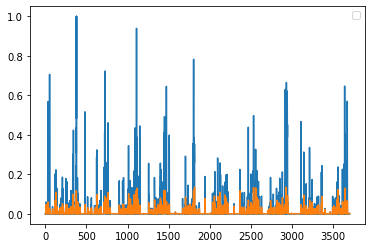

In [54]:
plt.plot(y_test)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
from sklearn.metrics import mean_absolute_error

In [56]:
mean_absolute_error(y,ypred)

0.01058955853354721

In [57]:
mean_absolute_error(y_test,ypred1)

0.02057472755157129

In [58]:
 from sklearn.metrics import r2_score
 r2_score(y,ypred)

0.16686566496201283

In [59]:
r2_score(y_test,ypred1)

0.11582176346256012

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, 1)))
model.add(keras.layers.LSTM(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [61]:
model.fit(X1, y1, validation_data=(X_test1,y_test1),epochs=50)

Train on 11997 samples, validate on 3701 samples
Epoch 1/50
11997/11997 [==============================] - 5s 416us/sample - loss: 0.0016 - acc: 0.8519 - val_loss: 3.0637e-04 - val_acc: 0.8533
Epoch 2/50
11997/11997 [==============================] - 4s 294us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 2.9475e-04 - val_acc: 0.8533
Epoch 3/50
11997/11997 [==============================] - 3s 289us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 2.9484e-04 - val_acc: 0.8533
Epoch 4/50
11997/11997 [==============================] - 3s 285us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 2.9816e-04 - val_acc: 0.8533
Epoch 5/50
11997/11997 [==============================] - 4s 295us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 2.9318e-04 - val_acc: 0.8533
Epoch 6/50
11997/11997 [==============================] - 4s 303us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 2.9988e-04 - val_acc: 0.8533
Epoch 7/50
11997/11997 [==============================] - 3s 291us/sample - loss: 0.001

In [62]:
ypred = model.predict(X1)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y1)
s1.corrwith(s, axis = 0) 

0    0.374406
dtype: float64

In [63]:
ypred1=model.predict(X_test1)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test1)
s1.corrwith(s,axis=0)

0   -0.000364
dtype: float64

In [64]:
mean_absolute_error(y1,ypred)

0.015313844833462764

In [65]:
mean_absolute_error(y_test1,ypred1)

0.0063616962443744166

In [66]:
r2_score(y1,ypred)

0.13586688448305295

In [67]:
r2_score(y_test1,ypred1)

-0.14597174668472523

In [0]:
ypred1[ypred1<0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

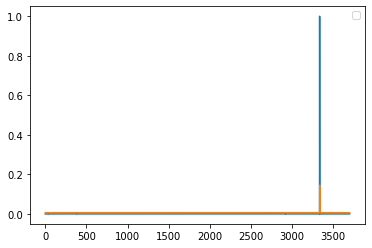

In [69]:
plt.plot(y_test1)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

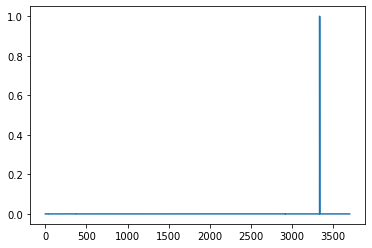

In [70]:
plt.plot(y_test1)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, 1)))
model.add(keras.layers.LSTM(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [72]:
model.fit(X2, y2, validation_data=(X_test2,y_test2),epochs=50)

Train on 11997 samples, validate on 3671 samples
Epoch 1/50
11997/11997 [==============================] - 5s 445us/sample - loss: 0.0049 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 2/50
11997/11997 [==============================] - 4s 300us/sample - loss: 0.0048 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 3/50
11997/11997 [==============================] - 4s 307us/sample - loss: 0.0048 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 4/50
11997/11997 [==============================] - 4s 300us/sample - loss: 0.0048 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 5/50
11997/11997 [==============================] - 4s 303us/sample - loss: 0.0047 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 6/50
11997/11997 [==============================] - 3s 287us/sample - loss: 0.0047 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 7/50
11997/11997 [==============================] - 3s 277us/sample - loss: 0.0047 - acc: 0.8414 - val_lo

In [73]:
ypred = model.predict(X2)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y2)
s1.corrwith(s, axis = 0) 

0    0.26236
dtype: float64

In [74]:
ypred1=model.predict(X_test2)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test2)
s1.corrwith(s,axis=0)

0    0.201596
dtype: float64

In [75]:
mean_absolute_error(y2,ypred)

0.030002200863367186

In [76]:
mean_absolute_error(y_test2,ypred1)

0.023852501549961283

In [78]:
r2_score(y2,ypred)

0.06625891154315677

In [79]:
r2_score(y_test2,ypred1)

0.014114910035411765

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

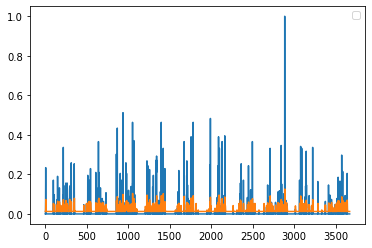

In [81]:
plt.plot(y_test2)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, 1)))
model.add(keras.layers.LSTM(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [83]:
model.fit(X3, y3, validation_data=(X_test3,y_test3),epochs=50)

Train on 11997 samples, validate on 3701 samples
Epoch 1/50
11997/11997 [==============================] - 5s 408us/sample - loss: 0.0033 - acc: 0.8605 - val_loss: 0.0041 - val_acc: 0.8708
Epoch 2/50
11997/11997 [==============================] - 4s 293us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0041 - val_acc: 0.8708
Epoch 3/50
11997/11997 [==============================] - 3s 286us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0040 - val_acc: 0.8708
Epoch 4/50
11997/11997 [==============================] - 3s 279us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0040 - val_acc: 0.8708
Epoch 5/50
11997/11997 [==============================] - 3s 285us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0041 - val_acc: 0.8708
Epoch 6/50
11997/11997 [==============================] - 3s 282us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0041 - val_acc: 0.8708
Epoch 7/50
11997/11997 [==============================] - 3s 282us/sample - loss: 0.0032 - acc: 0.8605 - val_lo

In [84]:
ypred = model.predict(X3)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y3)
s1.corrwith(s, axis = 0) 

0    0.265996
dtype: float64

In [85]:
ypred1=model.predict(X_test3)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test3)
s1.corrwith(s,axis=0)

0    0.202338
dtype: float64

In [86]:
r2_score(y3,ypred)

0.06925516819698951

In [87]:
r2_score(y_test3,ypred1)

0.03880471888221071

In [88]:
mean_absolute_error(y3,ypred)

0.02567478663759066

In [89]:
mean_absolute_error(y_test3,ypred1)

0.026048024438696034

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

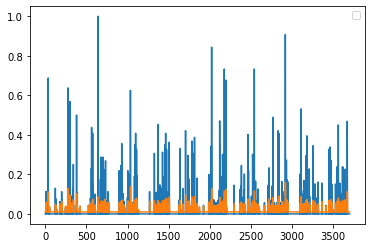

In [91]:
plt.plot(y_test3)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, 1)))
model.add(keras.layers.LSTM(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [93]:
model.fit(X4, y4, validation_data=(X_test4,y_test4),epochs=50)

Train on 11997 samples, validate on 3643 samples
Epoch 1/50
11997/11997 [==============================] - 5s 443us/sample - loss: 0.0029 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 2/50
11997/11997 [==============================] - 3s 286us/sample - loss: 0.0028 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 3/50
11997/11997 [==============================] - 3s 282us/sample - loss: 0.0028 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 4/50
11997/11997 [==============================] - 3s 279us/sample - loss: 0.0028 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 5/50
11997/11997 [==============================] - 3s 278us/sample - loss: 0.0028 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 6/50
11997/11997 [==============================] - 3s 274us/sample - loss: 0.0028 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 7/50
11997/11997 [==============================] - 3s 281us/sample - loss: 0.0028 - acc: 0.8360 - val_lo

In [94]:
ypred = model.predict(X4)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y4)
s1.corrwith(s, axis = 0) 

0    0.30134
dtype: float64

In [95]:
ypred1=model.predict(X_test4)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test4)
s1.corrwith(s,axis=0)

0    0.186627
dtype: float64

In [96]:
mean_absolute_error(y4,ypred)

0.02222775728153048

In [97]:
mean_absolute_error(y_test4,ypred1)

0.026593656433343323

In [98]:
r2_score(y4,ypred)

0.09022725560898948

In [99]:
r2_score(y_test4,ypred1)

0.023672614921257273

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

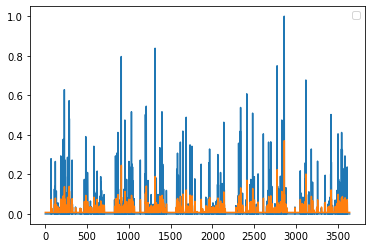

In [101]:
plt.plot(y_test4)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, 1)))
model.add(keras.layers.LSTM(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [103]:
model.fit(X5, y5, validation_data=(X_test5,y_test5),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 5s 444us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0031 - val_acc: 0.8614
Epoch 2/50
11997/11997 [==============================] - 3s 281us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0031 - val_acc: 0.8614
Epoch 3/50
11997/11997 [==============================] - 4s 294us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0030 - val_acc: 0.8614
Epoch 4/50
11997/11997 [==============================] - 3s 290us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0031 - val_acc: 0.8614
Epoch 5/50
11997/11997 [==============================] - 3s 283us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0031 - val_acc: 0.8614
Epoch 6/50
11997/11997 [==============================] - 3s 289us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0031 - val_acc: 0.8614
Epoch 7/50
11997/11997 [==============================] - 3s 285us/sample - loss: 0.0018 - acc: 0.8467 - val_lo

In [104]:
ypred = model.predict(X5)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y5)
s1.corrwith(s, axis = 0) 

0    0.260757
dtype: float64

In [105]:
r2_score(y5,ypred)

0.06747150483226305

In [106]:
ypred1=model.predict(X_test5)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test5)
s1.corrwith(s,axis=0)

0    0.175413
dtype: float64

In [107]:
mean_absolute_error(y5,ypred)

0.016799773672149503

In [108]:
mean_absolute_error(y_test5,ypred1)

0.020850604310898083

In [109]:
r2_score(y_test5,ypred1)

0.026347960524910063

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

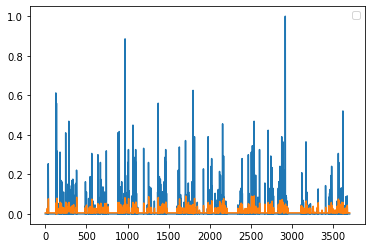

In [111]:
plt.plot(y_test5)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

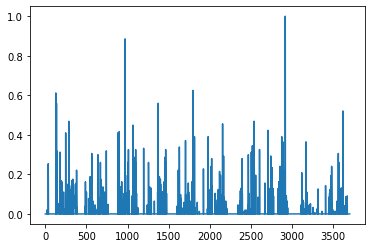

In [112]:
plt.plot(y_test5)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, 1)))
model.add(keras.layers.LSTM(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [114]:
model.fit(X6, y6, validation_data=(X_test6,y_test6),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 5s 446us/sample - loss: 0.0033 - acc: 0.8141 - val_loss: 0.0039 - val_acc: 0.8350
Epoch 2/50
11997/11997 [==============================] - 3s 281us/sample - loss: 0.0032 - acc: 0.8141 - val_loss: 0.0039 - val_acc: 0.8350
Epoch 3/50
11997/11997 [==============================] - 3s 276us/sample - loss: 0.0031 - acc: 0.8141 - val_loss: 0.0038 - val_acc: 0.8350
Epoch 4/50
11997/11997 [==============================] - 3s 275us/sample - loss: 0.0031 - acc: 0.8141 - val_loss: 0.0038 - val_acc: 0.8350
Epoch 5/50
11997/11997 [==============================] - 3s 273us/sample - loss: 0.0031 - acc: 0.8141 - val_loss: 0.0038 - val_acc: 0.8350
Epoch 6/50
11997/11997 [==============================] - 3s 274us/sample - loss: 0.0031 - acc: 0.8141 - val_loss: 0.0038 - val_acc: 0.8350
Epoch 7/50
11997/11997 [==============================] - 3s 274us/sample - loss: 0.0031 - acc: 0.8141 - val_lo

In [115]:
ypred = model.predict(X6)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y6)
s1.corrwith(s, axis = 0) 

0    0.31806
dtype: float64

In [116]:
r2_score(y6,ypred)

0.09984905494001894

In [117]:
ypred1=model.predict(X_test6)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test6)
s1.corrwith(s,axis=0)

0    0.271277
dtype: float64

In [118]:
mean_absolute_error(y6,ypred)

0.026004618596976302

In [119]:
mean_absolute_error(y_test6,ypred1)

0.02631557485254648

In [120]:
r2_score(y_test6,ypred1)

0.07206602338195411

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

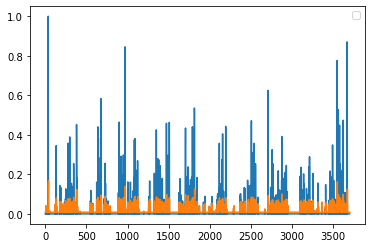

In [121]:
plt.plot(y_test6)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

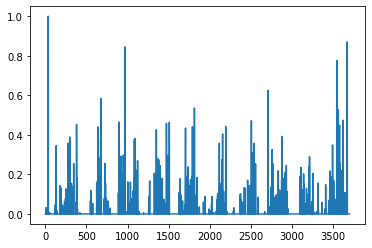

In [122]:
plt.plot(y_test6)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, 1)))
model.add(keras.layers.LSTM(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [124]:
model.fit(X7, y7, validation_data=(X_test7,y_test7),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 6s 459us/sample - loss: 0.0037 - acc: 0.8333 - val_loss: 0.0027 - val_acc: 0.8293
Epoch 2/50
11997/11997 [==============================] - 3s 278us/sample - loss: 0.0036 - acc: 0.8333 - val_loss: 0.0027 - val_acc: 0.8293
Epoch 3/50
11997/11997 [==============================] - 3s 281us/sample - loss: 0.0035 - acc: 0.8333 - val_loss: 0.0027 - val_acc: 0.8293
Epoch 4/50
11997/11997 [==============================] - 3s 281us/sample - loss: 0.0035 - acc: 0.8333 - val_loss: 0.0027 - val_acc: 0.8293
Epoch 5/50
11997/11997 [==============================] - 3s 274us/sample - loss: 0.0035 - acc: 0.8333 - val_loss: 0.0027 - val_acc: 0.8293
Epoch 6/50
11997/11997 [==============================] - 3s 271us/sample - loss: 0.0035 - acc: 0.8333 - val_loss: 0.0027 - val_acc: 0.8293
Epoch 7/50
11997/11997 [==============================] - 3s 275us/sample - loss: 0.0035 - acc: 0.8333 - val_lo

In [125]:
ypred = model.predict(X7)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y7)
s1.corrwith(s, axis = 0) 

0    0.343702
dtype: float64

In [126]:
r2_score(y7,ypred)

0.1156388762435685

In [127]:
ypred1=model.predict(X_test7)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test7)
s1.corrwith(s,axis=0)

0    0.199422
dtype: float64

In [128]:
r2_score(y_test7,ypred1)

0.02226129588999981

In [129]:
mean_absolute_error(y7,ypred)

0.02217984653743082

In [130]:
mean_absolute_error(y_test7,ypred1)

0.020058231575409344

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

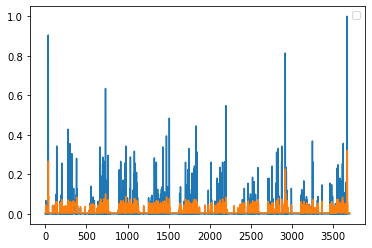

In [132]:
plt.plot(y_test7)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [133]:
model.fit(X8, y8, validation_data=(X_test8,y_test8),epochs=50)

Train on 11997 samples, validate on 3162 samples
Epoch 1/50
11997/11997 [==============================] - 3s 271us/sample - loss: 0.0036 - acc: 0.8384 - val_loss: 0.0039 - val_acc: 0.8447
Epoch 2/50
11997/11997 [==============================] - 3s 274us/sample - loss: 0.0036 - acc: 0.8384 - val_loss: 0.0039 - val_acc: 0.8447
Epoch 3/50
11997/11997 [==============================] - 3s 269us/sample - loss: 0.0036 - acc: 0.8384 - val_loss: 0.0038 - val_acc: 0.8447
Epoch 4/50
11997/11997 [==============================] - 3s 277us/sample - loss: 0.0036 - acc: 0.8384 - val_loss: 0.0039 - val_acc: 0.8447
Epoch 5/50
11997/11997 [==============================] - 3s 275us/sample - loss: 0.0036 - acc: 0.8384 - val_loss: 0.0038 - val_acc: 0.8447
Epoch 6/50
11997/11997 [==============================] - 3s 285us/sample - loss: 0.0036 - acc: 0.8384 - val_loss: 0.0039 - val_acc: 0.8447
Epoch 7/50
11997/11997 [==============================] - 3s 284us/sample - loss: 0.0036 - acc: 0.8384 - val_lo

In [134]:
ypred = model.predict(X8)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y8)
s1.corrwith(s, axis = 0) 

0    0.326575
dtype: float64

In [135]:
r2_score(y8,ypred)

0.10232789344154292

In [136]:
ypred1=model.predict(X_test8)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test8)
s1.corrwith(s,axis=0)

0    0.248547
dtype: float64

In [137]:
mean_absolute_error(y8,ypred)

0.027604892997057758

In [138]:
mean_absolute_error(y_test8,ypred1)

0.028441130244219077

In [139]:
r2_score(y_test8,ypred1)

0.05291153474704857

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

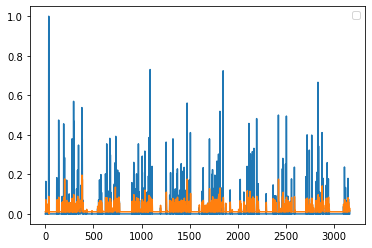

In [141]:
plt.plot(y_test8)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [142]:
model.fit(X9, y9, validation_data=(X_test9,y_test9),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 3s 283us/sample - loss: 3.7293e-04 - acc: 0.8766 - val_loss: 2.7106e-04 - val_acc: 0.8439
Epoch 2/50
11997/11997 [==============================] - 4s 348us/sample - loss: 3.5984e-04 - acc: 0.8766 - val_loss: 2.7787e-04 - val_acc: 0.8439
Epoch 3/50
11997/11997 [==============================] - 3s 289us/sample - loss: 3.5808e-04 - acc: 0.8766 - val_loss: 2.7065e-04 - val_acc: 0.8439
Epoch 4/50
11997/11997 [==============================] - 3s 288us/sample - loss: 3.5765e-04 - acc: 0.8766 - val_loss: 2.7182e-04 - val_acc: 0.8439
Epoch 5/50
11997/11997 [==============================] - 3s 291us/sample - loss: 3.5731e-04 - acc: 0.8766 - val_loss: 2.7078e-04 - val_acc: 0.8439
Epoch 6/50
11997/11997 [==============================] - 3s 282us/sample - loss: 3.5697e-04 - acc: 0.8766 - val_loss: 2.7697e-04 - val_acc: 0.8439
Epoch 7/50
11997/11997 [==============================] - 3s 28

In [143]:
ypred = model.predict(X9)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y9)
s1.corrwith(s, axis = 0) 

0    0.332768
dtype: float64

In [144]:
r2_score(y9,ypred)

0.10547280982158247

In [145]:
ypred1=model.predict(X_test9)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test9)
s1.corrwith(s,axis=0)

0    0.000009
dtype: float64

In [146]:
r2_score(y_test9,ypred1)

-0.00023246729097037289

In [147]:
mean_absolute_error(y9,ypred)

0.004902703218115634

In [148]:
mean_absolute_error(y_test9,ypred1)

0.0005479445278499208

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

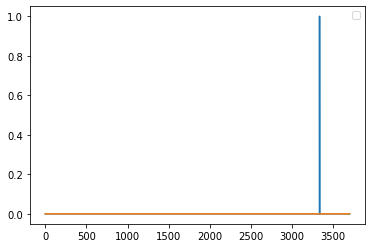

In [150]:
plt.plot(y_test9)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

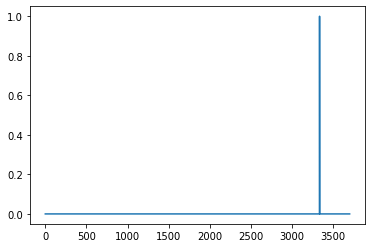

In [151]:
plt.plot(y_test9)
plt.show()

In [152]:
model.fit(X10, y10, validation_data=(X_test10,y_test10),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 4s 301us/sample - loss: 0.0027 - acc: 0.8375 - val_loss: 2.7964e-04 - val_acc: 0.8501
Epoch 2/50
11997/11997 [==============================] - 4s 316us/sample - loss: 0.0027 - acc: 0.8375 - val_loss: 2.8188e-04 - val_acc: 0.8501
Epoch 3/50
11997/11997 [==============================] - 4s 314us/sample - loss: 0.0026 - acc: 0.8375 - val_loss: 3.0138e-04 - val_acc: 0.8501
Epoch 4/50
11997/11997 [==============================] - 4s 307us/sample - loss: 0.0026 - acc: 0.8375 - val_loss: 2.7916e-04 - val_acc: 0.8501
Epoch 5/50
11997/11997 [==============================] - 4s 299us/sample - loss: 0.0026 - acc: 0.8375 - val_loss: 3.8169e-04 - val_acc: 0.8501
Epoch 6/50
11997/11997 [==============================] - 4s 315us/sample - loss: 0.0026 - acc: 0.8375 - val_loss: 2.8519e-04 - val_acc: 0.8501
Epoch 7/50
11997/11997 [==============================] - 4s 314us/sample - loss: 0.002

In [153]:
ypred = model.predict(X10)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y10)
s1.corrwith(s, axis = 0) 

0    0.377
dtype: float64

In [154]:
r2_score(y10,ypred)

0.14085438012295515

In [155]:
ypred1=model.predict(X_test10)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test10)
s1.corrwith(s,axis=0)

0   -0.000281
dtype: float64

In [156]:
r2_score(y_test10,ypred1)

-0.19512806052279474

In [157]:
mean_absolute_error(y_test10,ypred1)

0.007750735649182947

In [158]:
mean_absolute_error(y10,ypred)

0.021537126616663696

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

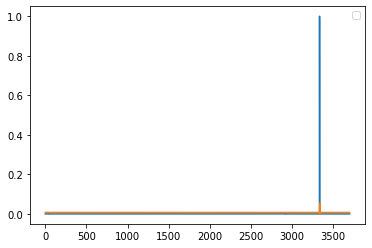

In [160]:
plt.plot(y_test10)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

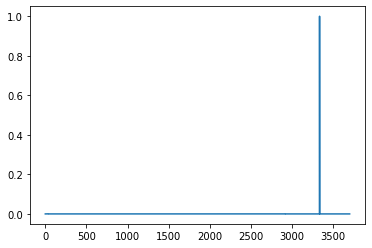

In [161]:
plt.plot(y_test10)
plt.show()

In [162]:
model.fit(X11, y11, validation_data=(X_test11,y_test11),epochs=50)

Train on 11997 samples, validate on 3342 samples
Epoch 1/50
11997/11997 [==============================] - 4s 313us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 3.9703e-04 - val_acc: 0.8606
Epoch 2/50
11997/11997 [==============================] - 4s 303us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 3.3037e-04 - val_acc: 0.8606
Epoch 3/50
11997/11997 [==============================] - 4s 327us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 3.7761e-04 - val_acc: 0.8606
Epoch 4/50
11997/11997 [==============================] - 4s 322us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 3.1866e-04 - val_acc: 0.8606
Epoch 5/50
11997/11997 [==============================] - 4s 304us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 3.5572e-04 - val_acc: 0.8606
Epoch 6/50
11997/11997 [==============================] - 4s 306us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 3.3934e-04 - val_acc: 0.8606
Epoch 7/50
11997/11997 [==============================] - 4s 310us/sample - loss: 0.002

In [163]:
ypred = model.predict(X11)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y11)
s1.corrwith(s, axis = 0) 

0    0.353422
dtype: float64

In [164]:
r2_score(y11,ypred)

0.12059398534934762

In [165]:
ypred1=model.predict(X_test11)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test11)
s1.corrwith(s,axis=0)

0   -0.000726
dtype: float64

In [166]:
r2_score(y_test11,ypred1)

-0.28941278324687847

In [167]:
mean_absolute_error(y_test11,ypred1)

0.009794645875188909

In [168]:
mean_absolute_error(y11,ypred)

0.022877344826070033

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

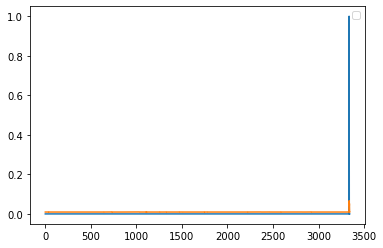

In [170]:
plt.plot(y_test11)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

NameError: ignored

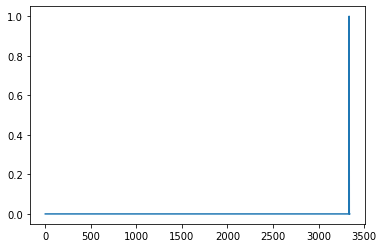

In [171]:
plt.plot(y_test11)
plt,show()

In [0]:
model.fit(X12, y12, validation_data=(X_test12,y_test12),epochs=50)

In [0]:
ypred = model.predict(X12)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y12)
s1.corrwith(s, axis = 0) 

In [0]:
r2_score(y12,ypred)

In [0]:
ypred1=model.predict(X_test12)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test12)
s1.corrwith(s,axis=0)

In [0]:
r2_score(y_test12,ypred1)

In [0]:
mean_absolute_error(y_test12,ypred1)

In [0]:
mean_absolute_error(y12,ypred)

In [0]:
ypred1[ypred1<0]=0

In [0]:
plt.plot(y_test12)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
plt.plot(y_test12)
plt.show()

In [0]:
model.fit(X13, y13, validation_data=(X_test13,y_test13),epochs=50)

In [0]:
ypred = model.predict(X13)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y13)
s1.corrwith(s, axis = 0) 

In [0]:
r2_score(y13,ypred)

In [0]:
ypred1=model.predict(X_test13)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test13)
s1.corrwith(s,axis=0)

In [0]:
r2_score(y_test13,ypred1)

In [0]:
mean_absolute_error(y_test13,ypred1)

In [0]:
mean_absolute_error(y13,ypred)

In [0]:
ypred1[ypred1<0]=0

In [0]:
plt.plot(y_test13)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
plt.plot(y_test13)
plt.show()

In [0]:
model.fit(X14, y14, validation_data=(X_test14,y_test14),epochs=50)

In [0]:
ypred = model.predict(X14)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y14)
s1.corrwith(s, axis = 0) 

In [0]:
from sklearn.metrics import r2_score
r2_score(y14,ypred)

In [0]:
ypred1=model.predict(X_test14)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test14)
s1.corrwith(s,axis=0)

In [0]:
r2_score(y_test14,ypred1)

In [0]:
mean_absolute_error(y_test14,ypred1)

In [0]:
mean_absolute_error(y14,ypred)

In [0]:
ypred1[ypred1<0]=0

In [0]:
plt.plot(y_test14)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
plt.plot(y_test14)
plt.show()

In [0]:
model.fit(X15, y15, validation_data=(X_test15,y_test15),epochs=50)

In [0]:
ypred = model.predict(X15)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y15)
s1.corrwith(s, axis = 0) 

In [0]:
from sklearn.metrics import r2_score
r2_score(y15,ypred)

In [0]:
ypred1=model.predict(X_test15)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test15)
s1.corrwith(s,axis=0)

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test15,ypred1)

In [0]:
mean_absolute_error(y_test15,ypred1)

In [0]:
mean_absolute_error(y15,ypred)

In [0]:
ypred1[ypred1<0]=0

In [0]:
plt.plot(y_test15)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
plt.plot(y_test15)
plt.show()

In [0]:
model.fit(X16, y16, validation_data=(X_test16,y_test16),epochs=100)

In [0]:
ypred = model.predict(X16)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y16)
s1.corrwith(s, axis = 0) 

In [0]:
from sklearn.metrics import r2_score
r2_score(y16,ypred)

In [0]:
ypred1=model.predict(X_test16)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test16)
s1.corrwith(s,axis=0)

In [0]:
r2_score(y_test16,ypred1)

In [0]:
mean_absolute_error(y_test16,ypred1)

In [0]:
mean_absolute_error(y16,ypred)

In [0]:
ypred1[ypred1<0]=0

In [0]:
plt.plot(y_test16)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
plt.plot(y_test16)
plt.show()

In [0]:
model.fit(X17, y17, validation_data=(X_test17,y_test17),epochs=50)

In [0]:
ypred = model.predict(X17)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y17)
s1.corrwith(s, axis = 0) 

In [0]:
from sklearn.metrics import r2_score
r2_score(y17,ypred)

In [0]:
ypred1=model.predict(X_test17)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test17)
s1.corrwith(s,axis=0)

In [0]:
r2_score(y_test17,ypred1)

In [0]:
mean_absolute_error(y_test17,ypred1)

In [0]:
mean_absolute_error(y17,ypred)

In [0]:
ypred1[ypred1<0]=0

In [0]:
plt.plot(y_test17)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
plt.plot(y_test17)
plt.show()

In [0]:
model.fit(X18, y18, validation_data=(X_test18,y_test18),epochs=100)

In [0]:
ypred = model.predict(X18)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y18)
s1.corrwith(s, axis = 0) 

In [0]:
from sklearn.metrics import r2_score
r2_score(y18,ypred)

In [0]:
ypred1 = model.predict(X_test18)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test18)
s1.corrwith(s, axis = 0) 

In [0]:
r2_score(y_test18,ypred1)

In [0]:
mean_absolute_error(y_test18,ypred1)

In [0]:
mean_absolute_error(y18,ypred)

In [0]:
ypred1[ypred1<0]=0

In [0]:
plt.plot(y_test18)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
plt.plot(y_test18)
plt.show()